### Prophet exercise

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [4]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [5]:
wmt

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400
...,...,...,...,...,...,...,...
11810,2019-06-26,110.849998,111.080002,110.099998,110.160004,110.160004,4161700
11811,2019-06-27,110.059998,110.510002,108.860001,110.099998,110.099998,5481300
11812,2019-06-28,110.550003,111.510002,110.239998,110.489998,110.489998,6506700
11813,2019-07-01,111.300003,111.970001,110.019997,110.620003,110.620003,5514700


* use only the `Date` and `Adj Close` columns

In [6]:
df = wmt[['Date', 'Adj Close']]

* rename columns to fit the Prophet naming convention

In [7]:
df.columns = ['ds', 'y']

* convert date to datetime

In [9]:
# change ds to datetime
df['ds'] = pd.to_datetime(df['ds'])

* plot time-series

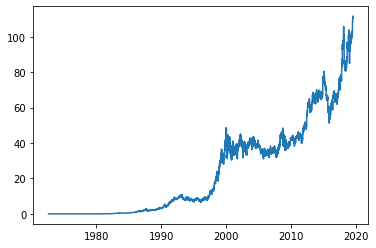

In [11]:
#plot time series
plt.plot(df['ds'], df['y']);

* instantiate Prophet

In [12]:
m = Prophet()

* fit model

In [13]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -562.06
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       32327.5      0.022851       8934.04           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       33070.2       0.02382       7548.75           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         33418    0.00334519       3032.09           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       33595.7      0.018702       1603.76           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       33775.9    0.00361332       675.202           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha   

* forecast 365 values into the future 

In [14]:
future = m.make_future_dataframe(periods=365)

* plot forecast

In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12175,2020-06-27,96.512024,91.260982,101.321477
12176,2020-06-28,96.514787,91.497324,101.367538
12177,2020-06-29,96.492644,91.750242,101.647667
12178,2020-06-30,96.513160,91.561448,101.166886
12179,2020-07-01,96.502739,91.342312,101.561435


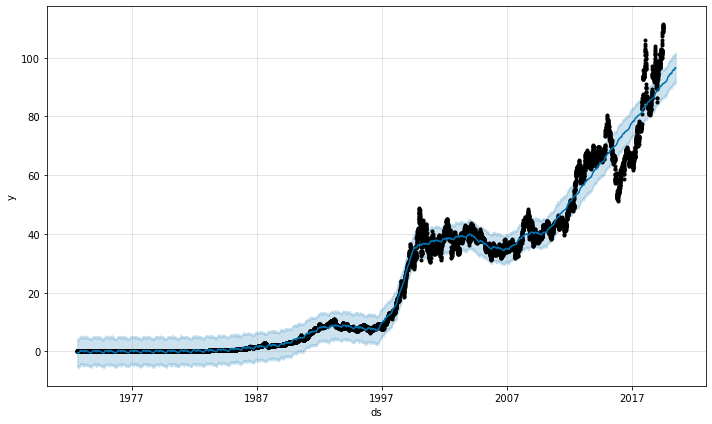

In [17]:
fig1 = m.plot(forecast)

* plot components

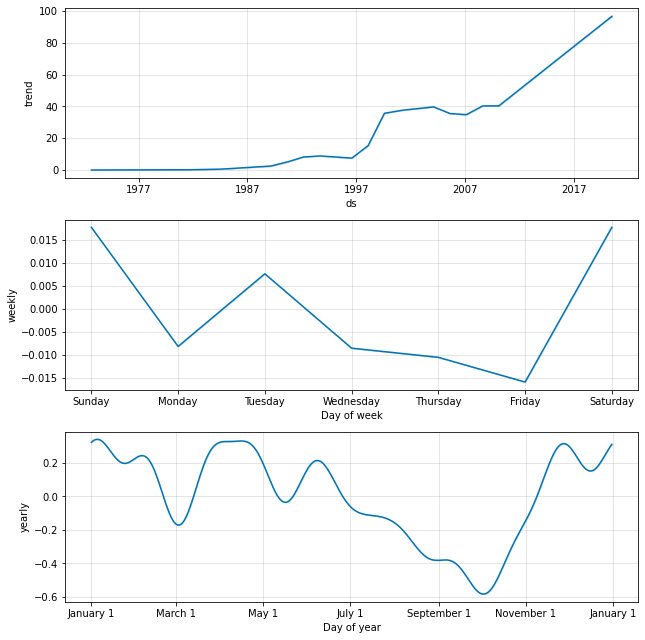

In [18]:
fig2 = m.plot_components(forecast)

- Compare the Prophet prediction vs the Arima prediction. Use the last 7 values we have in the timeseries as your test data.